## Preprocesado de datos

Ánalisis de datos y preprocesamiento

#### EDA

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

%matplotlib inline
plt.style.use('bmh')

In [39]:
df = pd.read_csv('../data/EstudioCrediticio_TrainP.csv')
df.head()

Id  Edad  IngresoBrutoAnual  ScoreCrediticio             SituacionLaboral  \
0   1    44              22119            613.0  Empleado/a por cuenta ajena   
1   2    26              28874            582.0  Empleado/a por cuenta ajena   
2   3    38              84154            507.0  Empleado/a por cuenta ajena   
3   4    51              29464            504.0                   Autónomo/a   
4   5    39              20646            542.0  Empleado/a por cuenta ajena   

        NivelEducativo  Experiencia  CuantiaCredito  DuracionCredito  \
0                   FP         20.0           16154               60   
1         Bachillerato          0.0           11800               24   
2  Grado universitario         17.0            9257               36   
3                   FP         25.0            5495               36   
4  Grado universitario         16.0           14824               60   

    EstadoCivil  ...  IngresoBrutoMensual HistoricoPagosSuministros  \
0  Divorciado/a  ...          1843.250000                  0.771340   
1  Divorciado/a  ...          2406.166667                       NaN   
2  Divorciado/a  ...          7012.833333                  0.881874   
3  Divorciado/a  ...          2455.333333                  0.797217   
4     Soltero/a  ...          1720.500000                  0.714030   

   EstabilidadLaboral  PatrimonioNeto  TipoInteresBase  TipoInteres  \
0                   2           28390         0.179654     0.171628   
1                   6          115113         0.160800     0.172783   
2                   4           41268         0.205757     0.217175   
3                   5            1927         0.203495     0.197683   
4                   3           10011         0.213824     0.212976   

   PagoMensualCredito  RatioTotalDeudaIngresos CreditoAprobado  ScoreRiesgo  
0          402.883608                 0.483322               0         50.0  
1          584.997790                 0.541524               0         54.0  
2          352.177802                 0.074460               1         42.4  
3          203.565671                 0.246633               1         45.6  
4          403.524570                 0.375196               0         61.0  

[5 rows x 36 columns]

In [40]:
# Separar las características (X) y la variable a predecir (y)
X = df.iloc[:, :-1]  # Todas las columnas menos la última
y = df.iloc[:, -1]   # La última columna

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             50000 non-null  int64  
 1   Edad                           50000 non-null  int64  
 2   IngresoBrutoAnual              50000 non-null  int64  
 3   ScoreCrediticio                47500 non-null  float64
 4   SituacionLaboral               50000 non-null  object 
 5   NivelEducativo                 45000 non-null  object 
 6   Experiencia                    37000 non-null  float64
 7   CuantiaCredito                 50000 non-null  int64  
 8   DuracionCredito                50000 non-null  int64  
 9   EstadoCivil                    39000 non-null  object 
 10  NumeroPersonasDependientes     44000 non-null  float64
 11  EstadoVivienda                 50000 non-null  object 
 12  PagoMensualDeuda               50000 non-null 

Podemos observar que existen variables tanto numéricas como categóricas. Además, hay algunas variables como EstadoCivil o Experiencia que contienen muchos valores nulos. 

Eliminaremos la primera columna relativa al id. Además, para el problema de regresión eliminaremos también la penúltima columna relativa al creditoaprobado, que es una variable que también se buscará predecir con otro modelo de clasificación.

In [42]:
df = df.drop(['Id'], axis=1)
df = df.drop(['CreditoAprobado'], axis=1)
df.head()

Edad  IngresoBrutoAnual  ScoreCrediticio             SituacionLaboral  \
0    44              22119            613.0  Empleado/a por cuenta ajena   
1    26              28874            582.0  Empleado/a por cuenta ajena   
2    38              84154            507.0  Empleado/a por cuenta ajena   
3    51              29464            504.0                   Autónomo/a   
4    39              20646            542.0  Empleado/a por cuenta ajena   

        NivelEducativo  Experiencia  CuantiaCredito  DuracionCredito  \
0                   FP         20.0           16154               60   
1         Bachillerato          0.0           11800               24   
2  Grado universitario         17.0            9257               36   
3                   FP         25.0            5495               36   
4  Grado universitario         16.0           14824               60   

    EstadoCivil  NumeroPersonasDependientes  ... TotalPasivos  \
0  Divorciado/a                         0.0  ...        45082   
1  Divorciado/a                         3.0  ...        62161   
2  Divorciado/a                         NaN  ...        19911   
3  Divorciado/a                         1.0  ...        42385   
4     Soltero/a                         1.0  ...         7201   

   IngresoBrutoMensual  HistoricoPagosSuministros  EstabilidadLaboral  \
0          1843.250000                   0.771340                   2   
1          2406.166667                        NaN                   6   
2          7012.833333                   0.881874                   4   
3          2455.333333                   0.797217                   5   
4          1720.500000                   0.714030                   3   

   PatrimonioNeto  TipoInteresBase  TipoInteres PagoMensualCredito  \
0           28390         0.179654     0.171628         402.883608   
1          115113         0.160800     0.172783         584.997790   
2           41268         0.205757     0.217175         352.177802   
3            1927         0.203495     0.197683         203.565671   
4           10011         0.213824     0.212976         403.524570   

   RatioTotalDeudaIngresos  ScoreRiesgo  
0                 0.483322         50.0  
1                 0.541524         54.0  
2                 0.074460         42.4  
3                 0.246633         45.6  
4                 0.375196         61.0  

[5 rows x 34 columns]

Vemos como se distribuye la variable objetivo

count    50000.000000
mean        50.742756
std          7.918796
min         26.400000
25%         44.800000
50%         52.000000
75%         56.000000
max         81.000000
Name: ScoreRiesgo, dtype: float64


<Figure size 900x800 with 0 Axes>

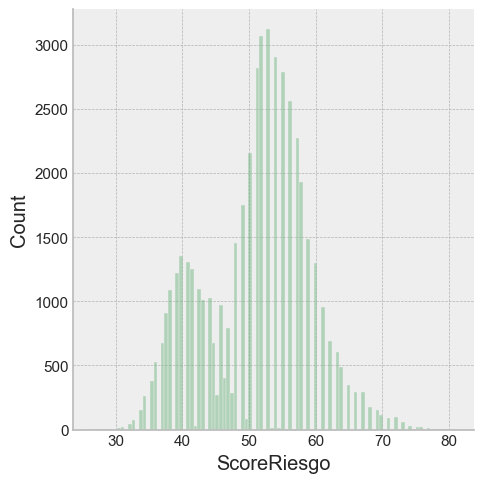

In [43]:
print(df['ScoreRiesgo'].describe())
plt.figure(figsize=(9, 8))
sns.displot(df['ScoreRiesgo'], kind='hist', color='g', bins=100, alpha=0.4);

Ahora estudiaremos la distribución de todas las variables. Primero veamos que tipos de variables tenemos.

In [44]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [45]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Edad  IngresoBrutoAnual  ScoreCrediticio  Experiencia  CuantiaCredito  \
0    44              22119            613.0         20.0           16154   
1    26              28874            582.0          0.0           11800   
2    38              84154            507.0         17.0            9257   
3    51              29464            504.0         25.0            5495   
4    39              20646            542.0         16.0           14824   

   DuracionCredito  NumeroPersonasDependientes  PagoMensualDeuda  \
0               60                         0.0               488   
1               24                         3.0               718   
2               36                         NaN               170   
3               36                         1.0               402   
4               60                         1.0               242   

   TasaUtilizacionTarjetaCredito  NumeroLineasCreditoAbiertas  ...  \
0                       0.390112                            2  ...   
1                       0.388221                            1  ...   
2                       0.358136                            2  ...   
3                       0.282602                            5  ...   
4                       0.156740                            6  ...   

   TotalPasivos  IngresoBrutoMensual  HistoricoPagosSuministros  \
0         45082          1843.250000                   0.771340   
1         62161          2406.166667                        NaN   
2         19911          7012.833333                   0.881874   
3         42385          2455.333333                   0.797217   
4          7201          1720.500000                   0.714030   

   EstabilidadLaboral  PatrimonioNeto  TipoInteresBase  TipoInteres  \
0                   2           28390         0.179654     0.171628   
1                   6          115113         0.160800     0.172783   
2                   4           41268         0.205757     0.217175   
3                   5            1927         0.203495     0.197683   
4                   3           10011         0.213824     0.212976   

   PagoMensualCredito  RatioTotalDeudaIngresos  ScoreRiesgo  
0          402.883608                 0.483322         50.0  
1          584.997790                 0.541524         54.0  
2          352.177802                 0.074460         42.4  
3          203.565671                 0.246633         45.6  
4          403.524570                 0.375196         61.0  

[5 rows x 29 columns]

array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'IngresoBrutoAnual'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'CuantiaCredito'}>],
       [<Axes: title={'center': 'DuracionCredito'}>,
        <Axes: title={'center': 'NumeroPersonasDependientes'}>,
        <Axes: title={'center': 'PagoMensualDeuda'}>,
        <Axes: title={'center': 'TasaUtilizacionTarjetaCredito'}>,
        <Axes: title={'center': 'NumeroLineasCreditoAbiertas'}>],
       [<Axes: title={'center': 'NumeroSolicitudesCredito'}>,
        <Axes: title={'center': 'RatioDeudaIngresos'}>,
        <Axes: title={'center': 'HistoricoInsolvencia'}>,
        <Axes: title={'center': 'HistoricoImpagos'}>,
        <Axes: title={'center': 'HistoricoPagos'}>],
       [<Axes: title={'center': 'DuracionHistoricoCredito'}>,
        <Axes: title={'center': 'BalanceCuentaAhorros'}>,
        <Axes: title={'center': 'BalanceC

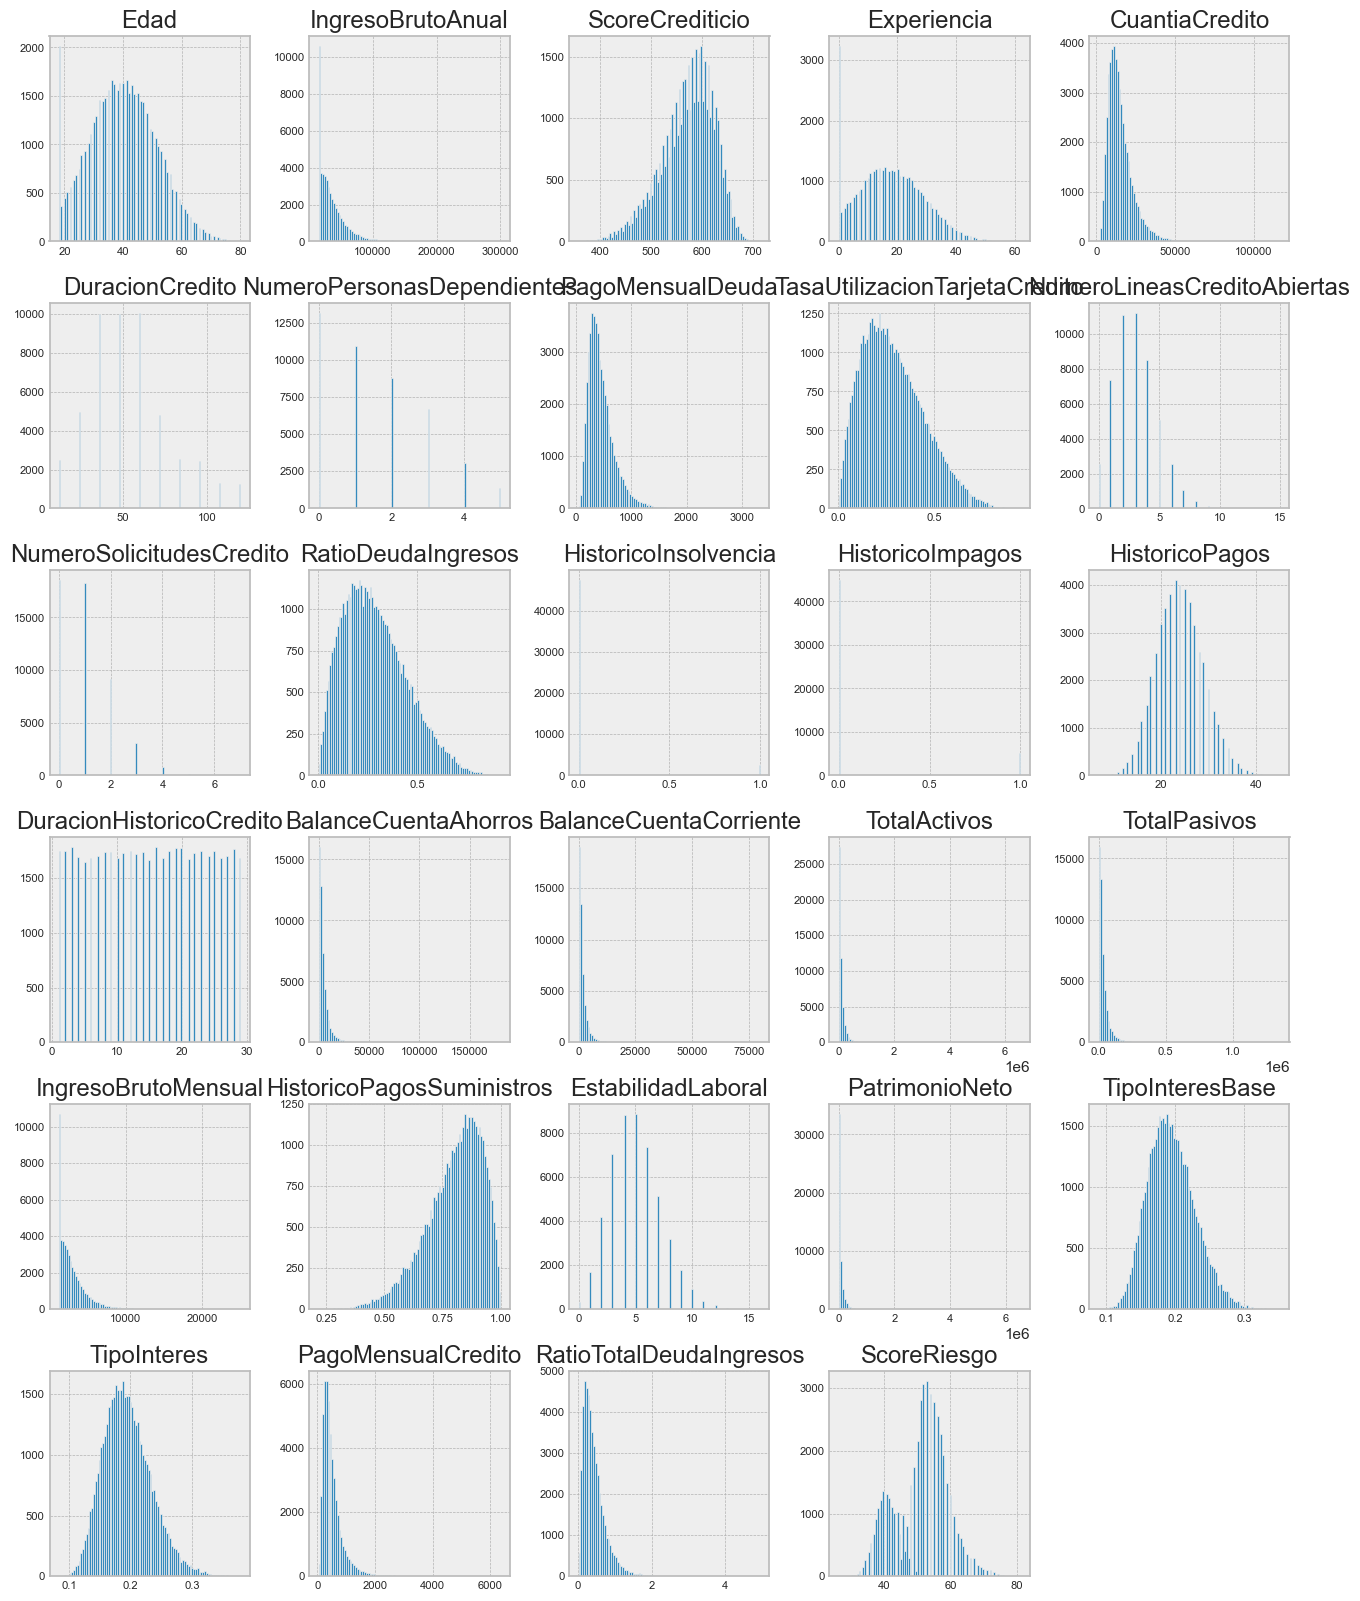

In [46]:
df_num.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

Ahora buscaremos aquellas variables que están fuertemente relacionadas con la variable dependiente.

Hay 0 variables altamente correlacionadas con ScoreRiesgo


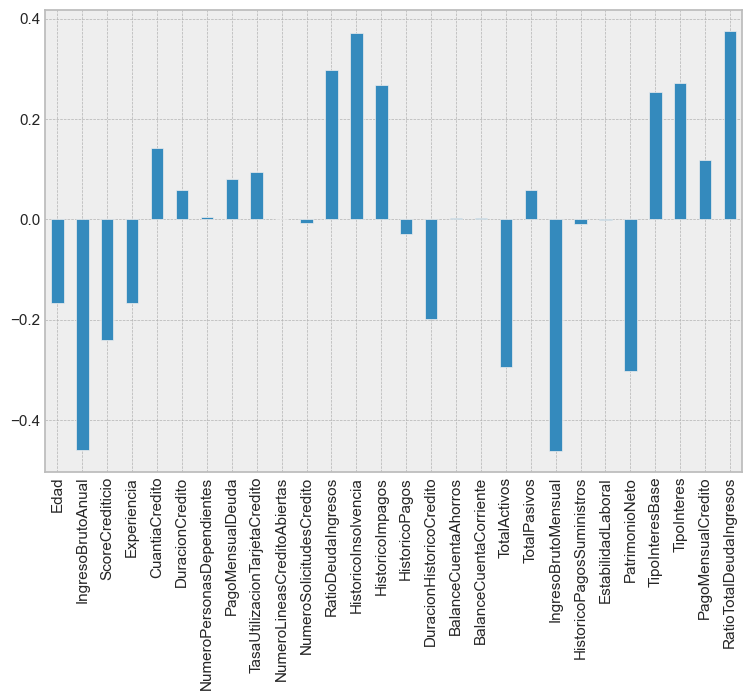

In [47]:
df_num_corr = df_num.corr()['ScoreRiesgo'][:-1]
df_num_corr.plot(kind='bar', figsize=(9, 6))
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Hay {} variables altamente correlacionadas con ScoreRiesgo".format(len(golden_features_list), golden_features_list))

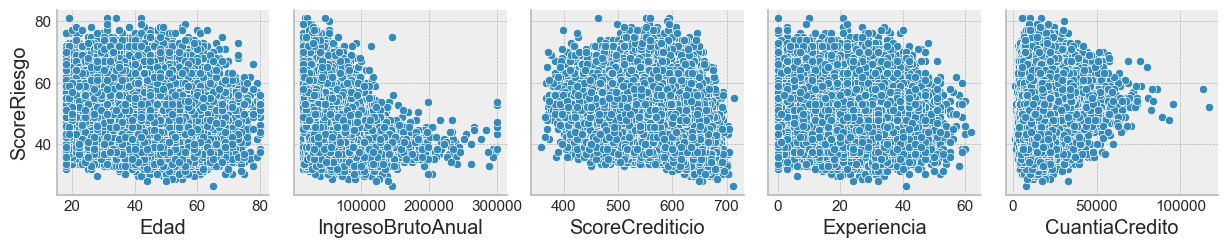

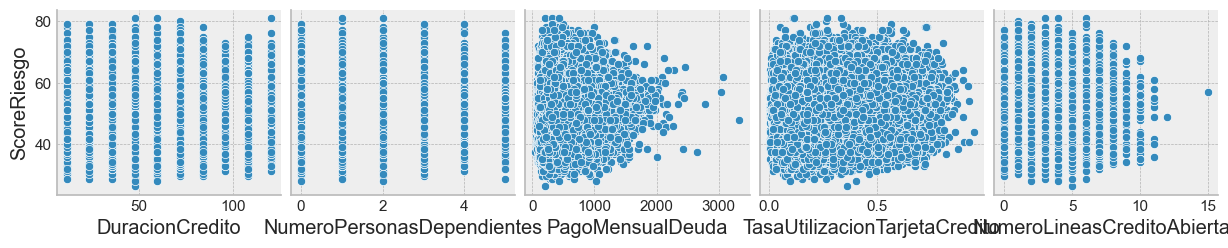

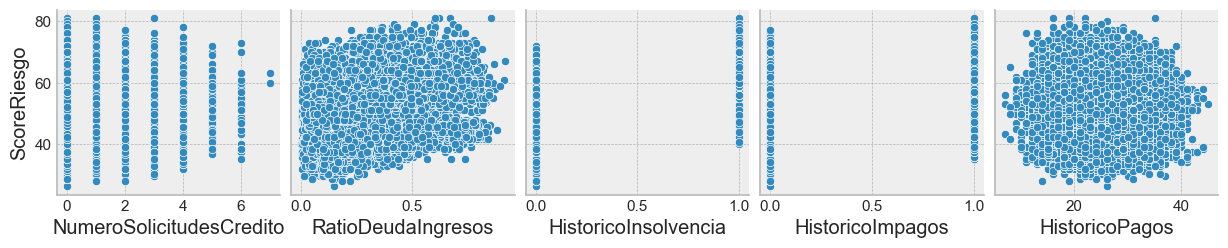

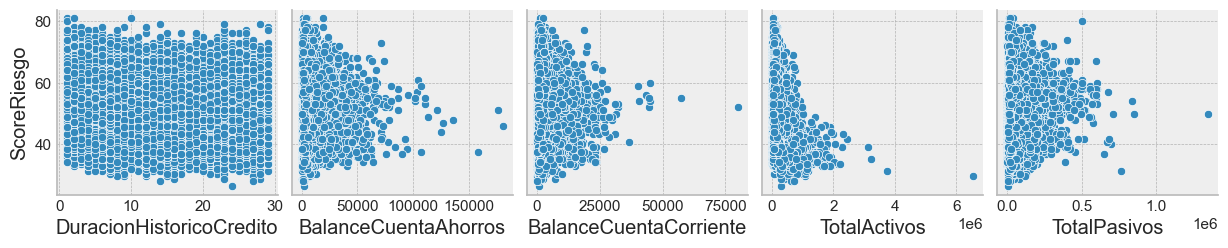

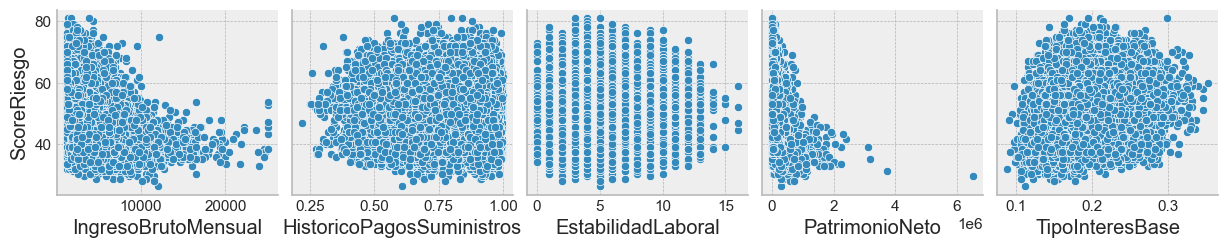

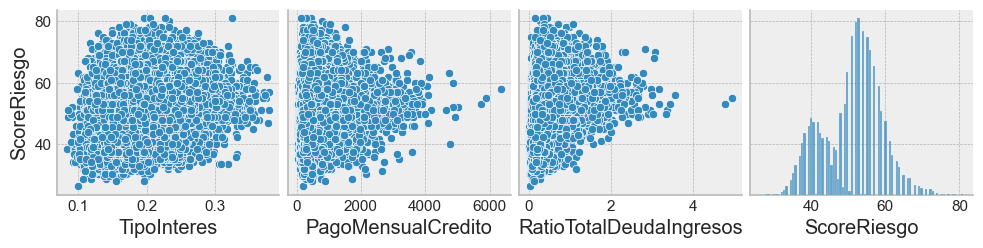

In [48]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, x_vars=df_num.columns[i:i+5], y_vars=['ScoreRiesgo'])

Librerías a utilizar para realizar el EDA.

Leemos el archivo del csv.

In [50]:
df = pd.read_csv('../data/EstudioCrediticio_TrainP.csv')
df.head(5)

Id  Edad  IngresoBrutoAnual  ScoreCrediticio             SituacionLaboral  \
0   1    44              22119            613.0  Empleado/a por cuenta ajena   
1   2    26              28874            582.0  Empleado/a por cuenta ajena   
2   3    38              84154            507.0  Empleado/a por cuenta ajena   
3   4    51              29464            504.0                   Autónomo/a   
4   5    39              20646            542.0  Empleado/a por cuenta ajena   

        NivelEducativo  Experiencia  CuantiaCredito  DuracionCredito  \
0                   FP         20.0           16154               60   
1         Bachillerato          0.0           11800               24   
2  Grado universitario         17.0            9257               36   
3                   FP         25.0            5495               36   
4  Grado universitario         16.0           14824               60   

    EstadoCivil  ...  IngresoBrutoMensual HistoricoPagosSuministros  \
0  Divorciado/a  ...          1843.250000                  0.771340   
1  Divorciado/a  ...          2406.166667                       NaN   
2  Divorciado/a  ...          7012.833333                  0.881874   
3  Divorciado/a  ...          2455.333333                  0.797217   
4     Soltero/a  ...          1720.500000                  0.714030   

   EstabilidadLaboral  PatrimonioNeto  TipoInteresBase  TipoInteres  \
0                   2           28390         0.179654     0.171628   
1                   6          115113         0.160800     0.172783   
2                   4           41268         0.205757     0.217175   
3                   5            1927         0.203495     0.197683   
4                   3           10011         0.213824     0.212976   

   PagoMensualCredito  RatioTotalDeudaIngresos CreditoAprobado  ScoreRiesgo  
0          402.883608                 0.483322               0         50.0  
1          584.997790                 0.541524               0         54.0  
2          352.177802                 0.074460               1         42.4  
3          203.565671                 0.246633               1         45.6  
4          403.524570                 0.375196               0         61.0  

[5 rows x 36 columns]

In [51]:
df.tail(5) #Imprime las ultimas 5 filas

Id  Edad  IngresoBrutoAnual  ScoreCrediticio  \
49995  49996    40              29951            600.0   
49996  49997    31              31974            466.0   
49997  49998    55              68679            611.0   
49998  49999    36              23501            599.0   
49999  50000    24              31136            580.0   

                  SituacionLaboral NivelEducativo  Experiencia  \
49995  Empleado/a por cuenta ajena             FP         18.0   
49996  Empleado/a por cuenta ajena      Doctorado          NaN   
49997  Empleado/a por cuenta ajena   Bachillerato         31.0   
49998  Empleado/a por cuenta ajena   Bachillerato         11.0   
49999  Empleado/a por cuenta ajena             FP          2.0   

       CuantiaCredito  DuracionCredito   EstadoCivil  ...  \
49995            5945               24  Divorciado/a  ...   
49996           13572               72      Casado/a  ...   
49997           16481               60      Casado/a  ...   
49998           29518               12      Casado/a  ...   
49999            8380               36           NaN  ...   

       IngresoBrutoMensual HistoricoPagosSuministros  EstabilidadLaboral  \
49995          2495.916667                       NaN                   5   
49996          2664.500000                  0.797176                   6   
49997          5723.250000                  0.957306                   7   
49998          1250.000000                  0.813055                   2   
49999          2594.666667                       NaN                   7   

       PatrimonioNeto  TipoInteresBase  TipoInteres  PagoMensualCredito  \
49995           43626         0.145945     0.142934          286.261413   
49996           10350         0.260572     0.245778          362.082922   
49997           31159         0.180981     0.182967          421.174132   
49998           61452         0.160018     0.148244         2661.800236   
49999           11516         0.168380     0.167265          297.630591   

       RatioTotalDeudaIngresos CreditoAprobado  ScoreRiesgo  
49995                 0.216859               1         38.4  
49996                 0.318290               0         50.0  
49997                 0.186638               0         63.0  
49998                 2.647840               0         61.0  
49999                 0.477376               0         56.0  

[5 rows x 36 columns]

Ahora comprobaremos el tipo de datos que tiene cada una de las columnas.

In [52]:
df.dtypes

Id                                 int64
Edad                               int64
IngresoBrutoAnual                  int64
ScoreCrediticio                  float64
SituacionLaboral                  object
NivelEducativo                    object
Experiencia                      float64
CuantiaCredito                     int64
DuracionCredito                    int64
EstadoCivil                       object
NumeroPersonasDependientes       float64
EstadoVivienda                    object
PagoMensualDeuda                   int64
TasaUtilizacionTarjetaCredito    float64
NumeroLineasCreditoAbiertas        int64
NumeroSolicitudesCredito           int64
RatioDeudaIngresos               float64
HistoricoInsolvencia               int64
ObjetoCredito                     object
HistoricoImpagos                   int64
HistoricoPagos                     int64
DuracionHistoricoCredito           int64
BalanceCuentaAhorros               int64
BalanceCuentaCorriente             int64
TotalActivos    

Eliminamos las columnas irrelevantes. En este caso son la de Id y la de CreditoAprobado.

In [53]:
df = df.drop(['Id', 'CreditoAprobado'], axis = 1)
df.head(5)

Edad  IngresoBrutoAnual  ScoreCrediticio             SituacionLaboral  \
0    44              22119            613.0  Empleado/a por cuenta ajena   
1    26              28874            582.0  Empleado/a por cuenta ajena   
2    38              84154            507.0  Empleado/a por cuenta ajena   
3    51              29464            504.0                   Autónomo/a   
4    39              20646            542.0  Empleado/a por cuenta ajena   

        NivelEducativo  Experiencia  CuantiaCredito  DuracionCredito  \
0                   FP         20.0           16154               60   
1         Bachillerato          0.0           11800               24   
2  Grado universitario         17.0            9257               36   
3                   FP         25.0            5495               36   
4  Grado universitario         16.0           14824               60   

    EstadoCivil  NumeroPersonasDependientes  ... TotalPasivos  \
0  Divorciado/a                         0.0  ...        45082   
1  Divorciado/a                         3.0  ...        62161   
2  Divorciado/a                         NaN  ...        19911   
3  Divorciado/a                         1.0  ...        42385   
4     Soltero/a                         1.0  ...         7201   

   IngresoBrutoMensual  HistoricoPagosSuministros  EstabilidadLaboral  \
0          1843.250000                   0.771340                   2   
1          2406.166667                        NaN                   6   
2          7012.833333                   0.881874                   4   
3          2455.333333                   0.797217                   5   
4          1720.500000                   0.714030                   3   

   PatrimonioNeto  TipoInteresBase  TipoInteres PagoMensualCredito  \
0           28390         0.179654     0.171628         402.883608   
1          115113         0.160800     0.172783         584.997790   
2           41268         0.205757     0.217175         352.177802   
3            1927         0.203495     0.197683         203.565671   
4           10011         0.213824     0.212976         403.524570   

   RatioTotalDeudaIngresos  ScoreRiesgo  
0                 0.483322         50.0  
1                 0.541524         54.0  
2                 0.074460         42.4  
3                 0.246633         45.6  
4                 0.375196         61.0  

[5 rows x 34 columns]

Eliminamos duplicados. En este caso no tenemos ninguno.

In [54]:
df.shape

(50000, 34)

In [55]:
duplicated_rows_df = df[df.duplicated()]
print("Número de filas duplicadas: ", duplicated_rows_df.shape)

Número de filas duplicadas:  (0, 34)


El siguiente paso sería eliminar o rellenar los valores nulos. Vemos que hay columnas con numerosos valores nulos. Resaltan Experiencia y EstadoCivil, seguramente porque sean datos de carácter personal a los que el banco no tenga acceso tan fácil.

In [56]:
null_columns = df.columns[df.isnull().any()]
print(df.isnull().sum()[null_columns])

ScoreCrediticio                2500
NivelEducativo                 5000
Experiencia                   13000
EstadoCivil                   11000
NumeroPersonasDependientes     6000
HistoricoPagosSuministros      8500
dtype: int64


En nuestro caso, rellenaremos los datos con algún imputer de skrlearn. Se indicará más adelante al construir los pipes.

Observando las distribuciones, vemos que muchas columnas como 'IngresoBrutoAnual' o 'BalanceCuentaCorriente' presentan outliers. 

A continuación, se realizará un test para comparar el efecto de diferentes _scalers_ en nuestros datos con _outliers_.

## Prueba Outliers

In [60]:
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

En este punto, se mostrarán dos gráfico para cada _scaler_:
- La figura de la izquierda mostrará un diagrama de dispersión de **todo** el conjunto de datos
- La figura de la derecha excluirá los valores extremos, considerando solo el **99%** del conjunto de datos y excluyendo los _outliers_



In [61]:
feature_mapping = {
    "IngresoBrutoAnual": "Ingreso Bruto Anual",
    "CuantiaCredito" : "Cuantía del Crédito",
    "PagoMensualDeuda": "Pago Mensual de Deuda",
    "BalanceCuentaAhorros": "Balance Cuenta Ahorros",
    "BalanceCuentaCorriente": "Balance Cuenta Corriente",
    "TotalActivos": "Total Activos",
    "TotalPasivos": "Total Pasivos",
    "IngresoBrutoMensual": "Ingreso Bruto Mensual",
    "PatrimonioNeto": "Patrimonio Neto",
    "PagoMensualCredito": "Pago Mensual Crédito",
    "RatioTotalDeudaIngresos": "Ratio Total Deuda Ingresos",
}

features = ["IngresoBrutoAnual", "PatrimonioNeto"]

# Seleccionar solo las columnas que necesitas
X_selected = df_num[features].to_numpy()

distributions = [
    ("Unscaled data", X_selected),
    ("Data after standard scaling", StandardScaler().fit_transform(X_selected)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X_selected)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X_selected)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X_selected),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X_selected),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X_selected),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(
            output_distribution="uniform", random_state=42
        ).fit_transform(X_selected),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(
            output_distribution="normal", random_state=42
        ).fit_transform(X_selected),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X_selected)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [62]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y.min(), y.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

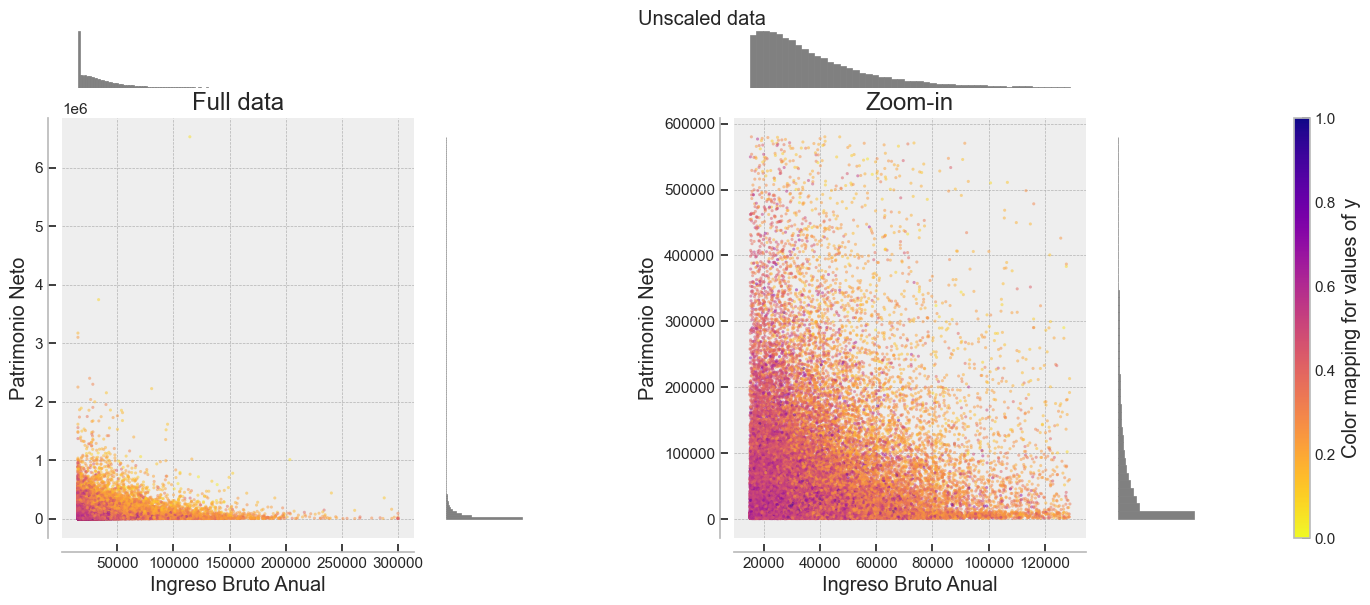

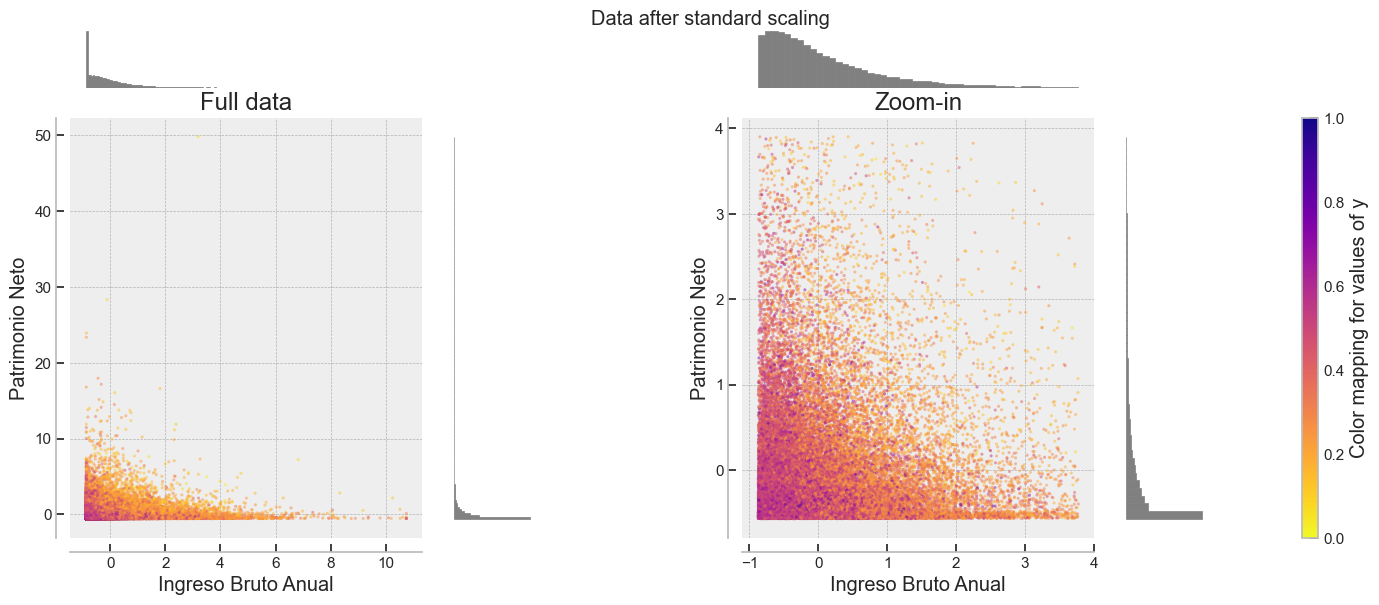

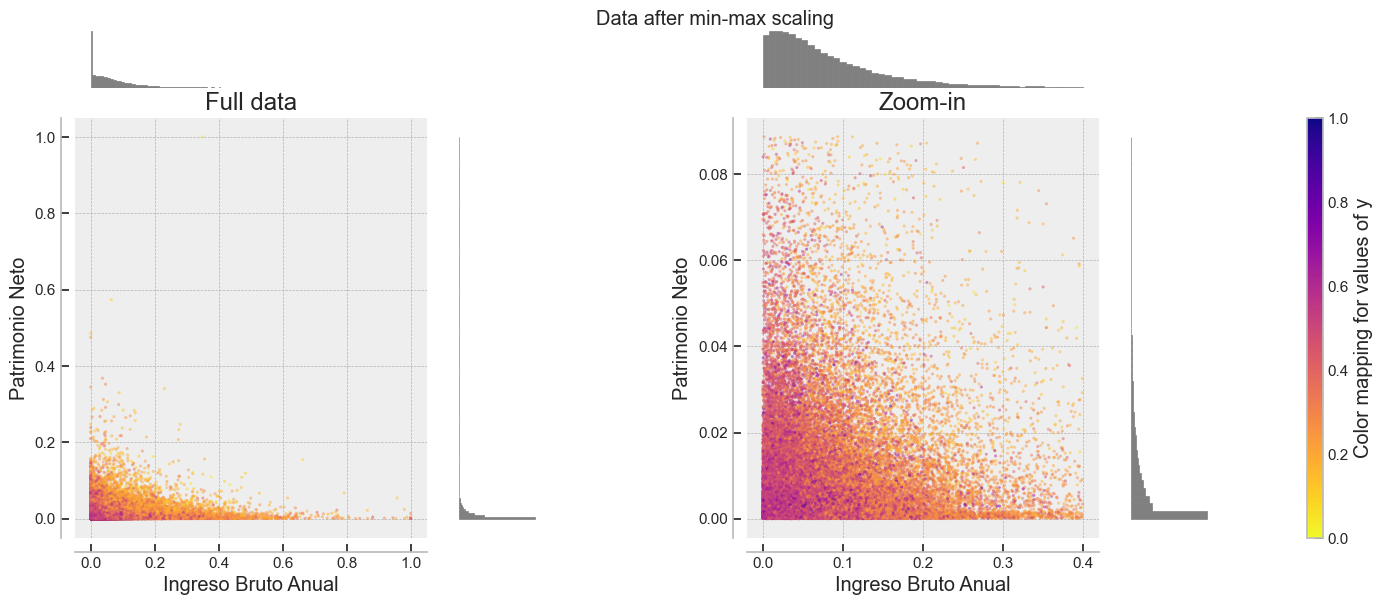

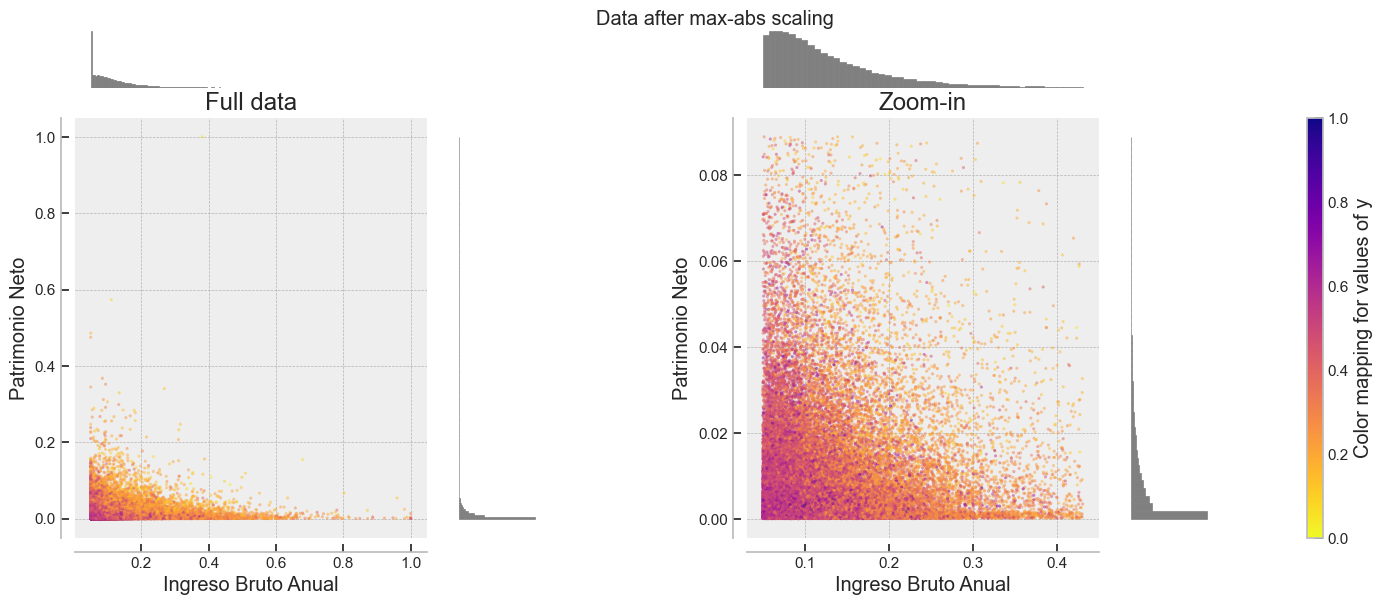

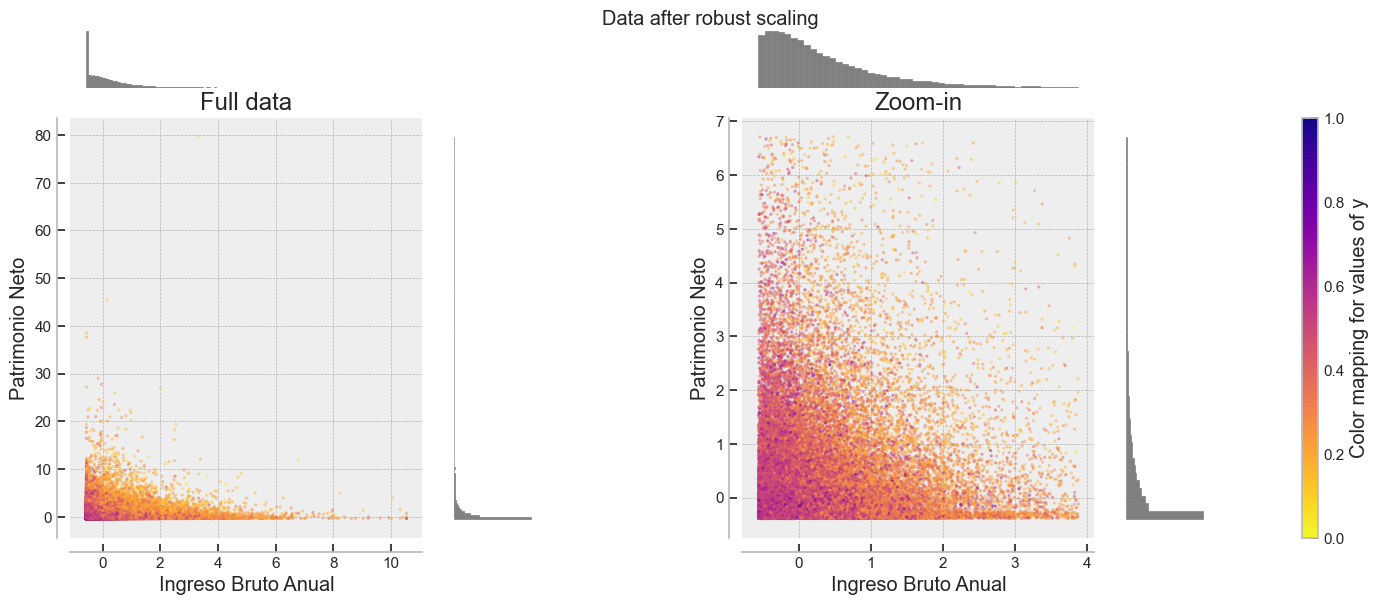

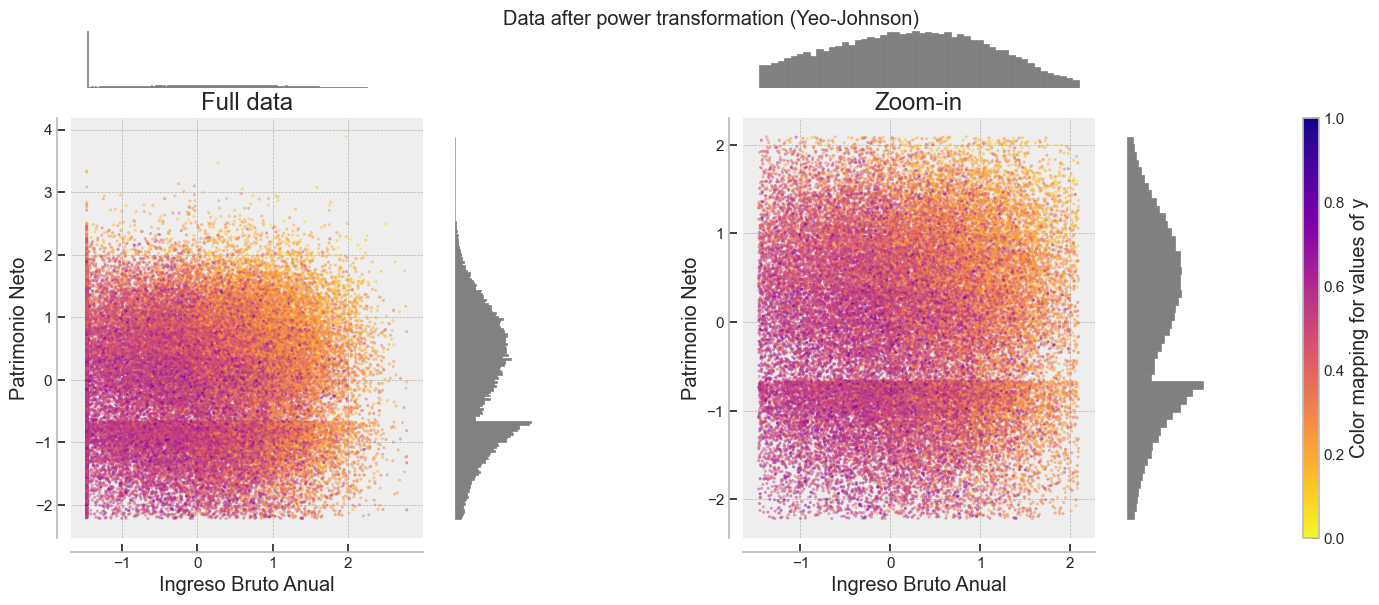

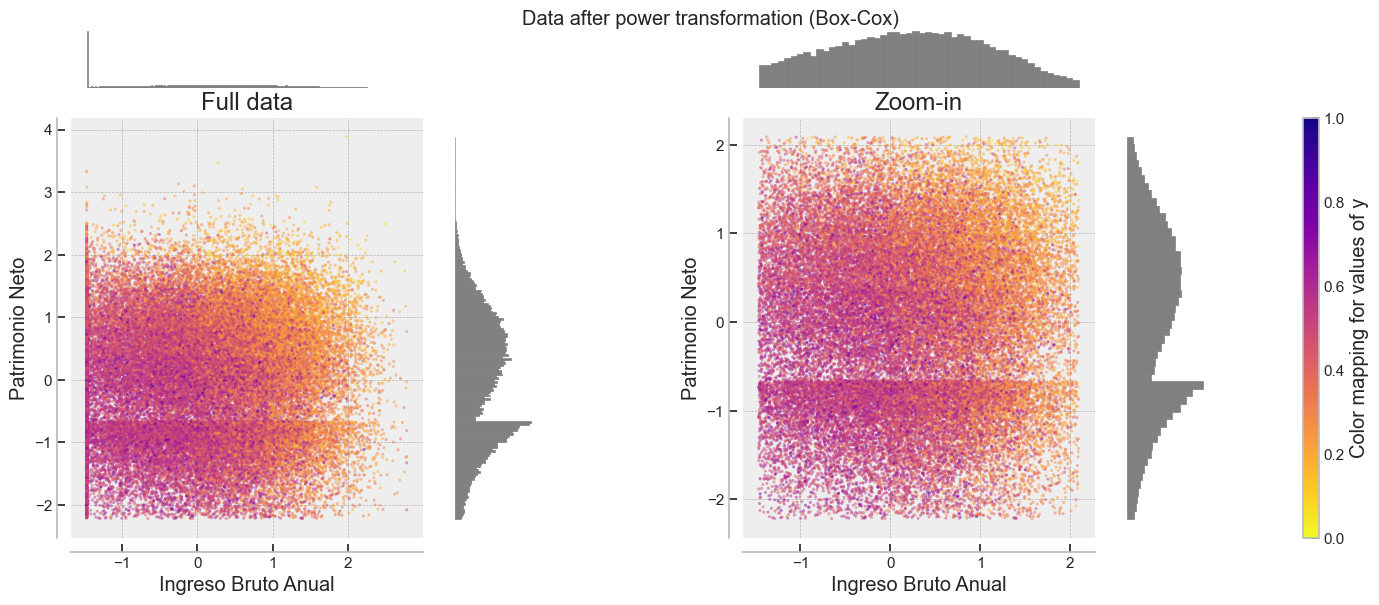

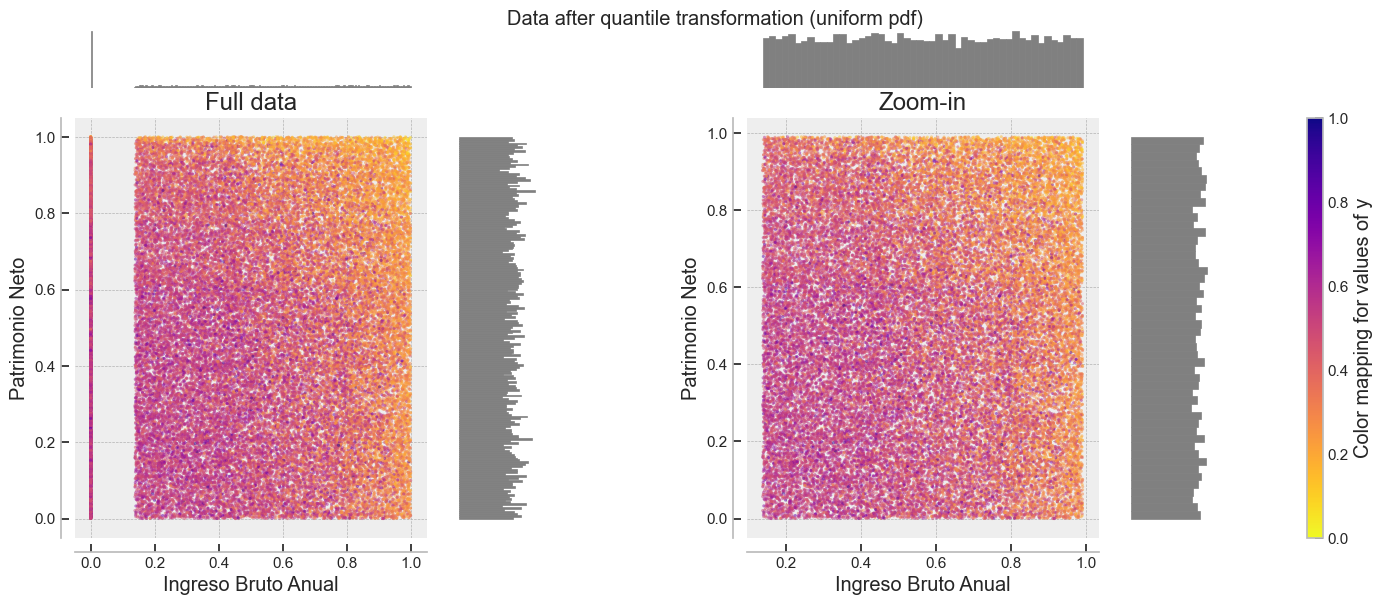

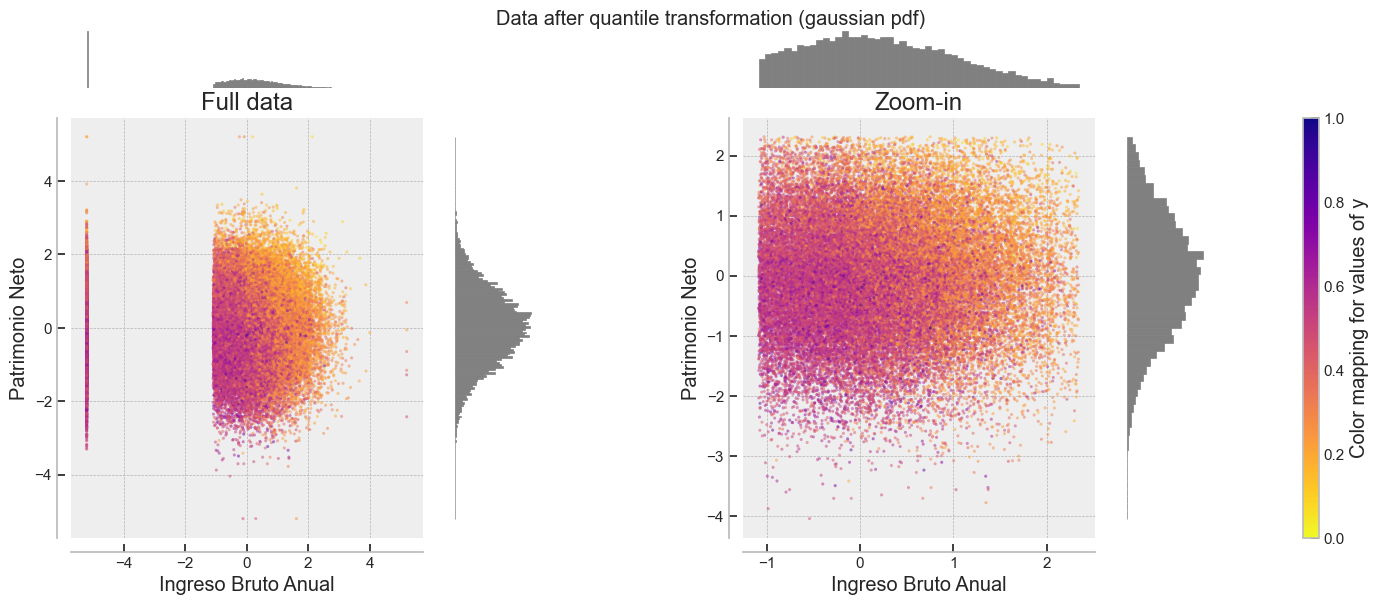

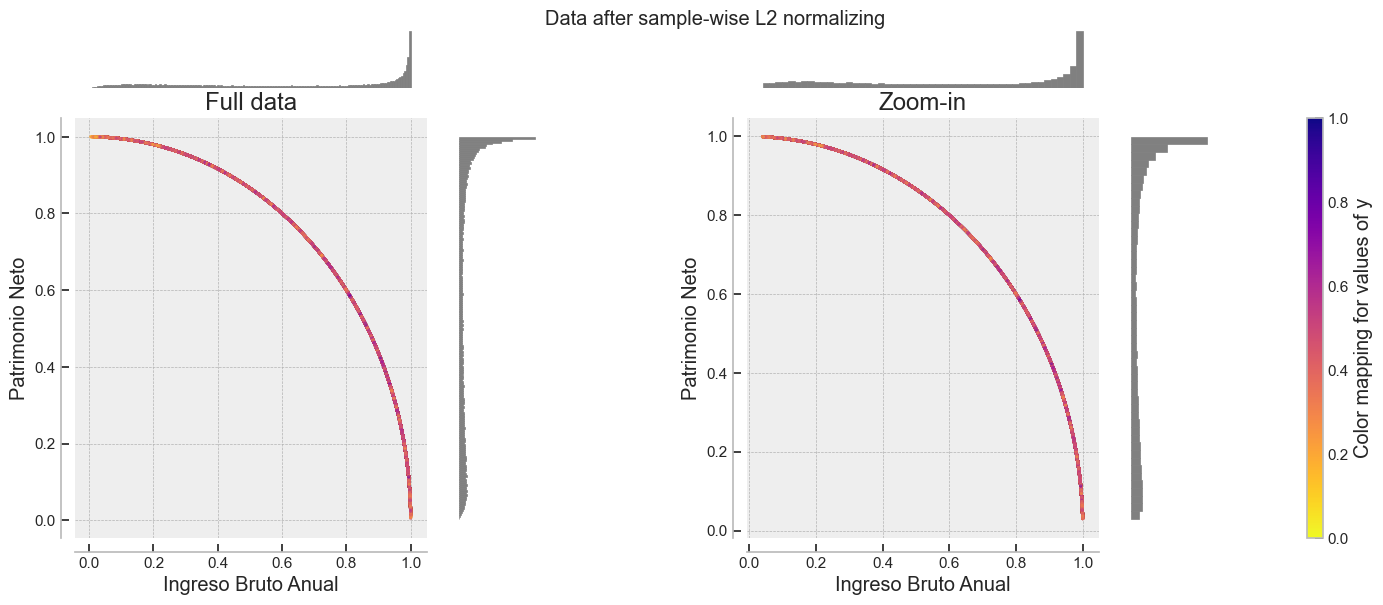

In [63]:
for i in range(len(distributions)):
    make_plot(i)
    plt.show()

Se puede observar que en caso de usar un modelo sensible a _outliers_, los _scalers_ que mejor funcionan son **PowerTransformer** y **QuantileTransformer**.

Ejemplo

In [64]:
# Crear una instancia de RobustScaler
scaler = PowerTransformer(method='yeo-johnson')

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_scaled.head()


Edad  IngresoBrutoAnual  ScoreCrediticio  Experiencia  CuantiaCredito  \
0  0.399434          -0.541737         0.814023     0.331589        0.368980   
1 -1.201258           0.003375         0.119535    -1.868322       -0.260202   
2 -0.109115           1.633880        -1.236148     0.087928       -0.746397   
3  0.968665           0.042118        -1.281632     0.712263       -1.790935   
4 -0.022872          -0.693762        -0.657477     0.003617        0.196846   

   DuracionCredito  NumeroPersonasDependientes  PagoMensualDeuda  \
0         0.368324                   -1.300912          0.379023   
1        -1.316518                    1.062812          1.144926   
2        -0.660412                         NaN         -1.714349   
3        -0.660412                   -0.166634         -0.005707   
4         0.368324                   -0.166634         -1.013282   

   TasaUtilizacionTarjetaCredito  NumeroLineasCreditoAbiertas  ...  \
0                       0.753379                    -0.504210  ...   
1                       0.743209                    -1.218781  ...   
2                       0.577087                    -0.504210  ...   
3                       0.120563                     1.126216  ...   
4                      -0.793192                     1.575696  ...   

   TotalPasivos  IngresoBrutoMensual  HistoricoPagosSuministros  \
0      0.708636            -0.532722                  -0.406399   
1      1.029726             0.014221                        NaN   
2     -0.106151             1.646053                   0.652243   
3      0.647029             0.053072                  -0.185283   
4     -1.116100            -0.685353                  -0.844410   

   EstabilidadLaboral  PatrimonioNeto  TipoInteresBase  TipoInteres  \
0           -1.434715       -0.023595        -0.381288    -0.542017   
1            0.510634        0.940888        -1.007097    -0.508471   
2           -0.381002        0.231365         0.402148     0.651410   
3            0.079888       -1.799518         0.337791     0.171653   
4           -0.880962       -0.723656         0.626524     0.551678   

   PagoMensualCredito  RatioTotalDeudaIngresos  ScoreRiesgo  
0           -0.051971                 0.463373    -0.103363  
1            0.549818                 0.654528     0.404111  
2           -0.276450                -1.873664    -1.053903  
3           -1.233584                -0.609331    -0.655969  
4           -0.049342                 0.041700     1.302948  

[5 rows x 29 columns]

array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'IngresoBrutoAnual'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'CuantiaCredito'}>],
       [<Axes: title={'center': 'DuracionCredito'}>,
        <Axes: title={'center': 'NumeroPersonasDependientes'}>,
        <Axes: title={'center': 'PagoMensualDeuda'}>,
        <Axes: title={'center': 'TasaUtilizacionTarjetaCredito'}>,
        <Axes: title={'center': 'NumeroLineasCreditoAbiertas'}>],
       [<Axes: title={'center': 'NumeroSolicitudesCredito'}>,
        <Axes: title={'center': 'RatioDeudaIngresos'}>,
        <Axes: title={'center': 'HistoricoInsolvencia'}>,
        <Axes: title={'center': 'HistoricoImpagos'}>,
        <Axes: title={'center': 'HistoricoPagos'}>],
       [<Axes: title={'center': 'DuracionHistoricoCredito'}>,
        <Axes: title={'center': 'BalanceCuentaAhorros'}>,
        <Axes: title={'center': 'BalanceC

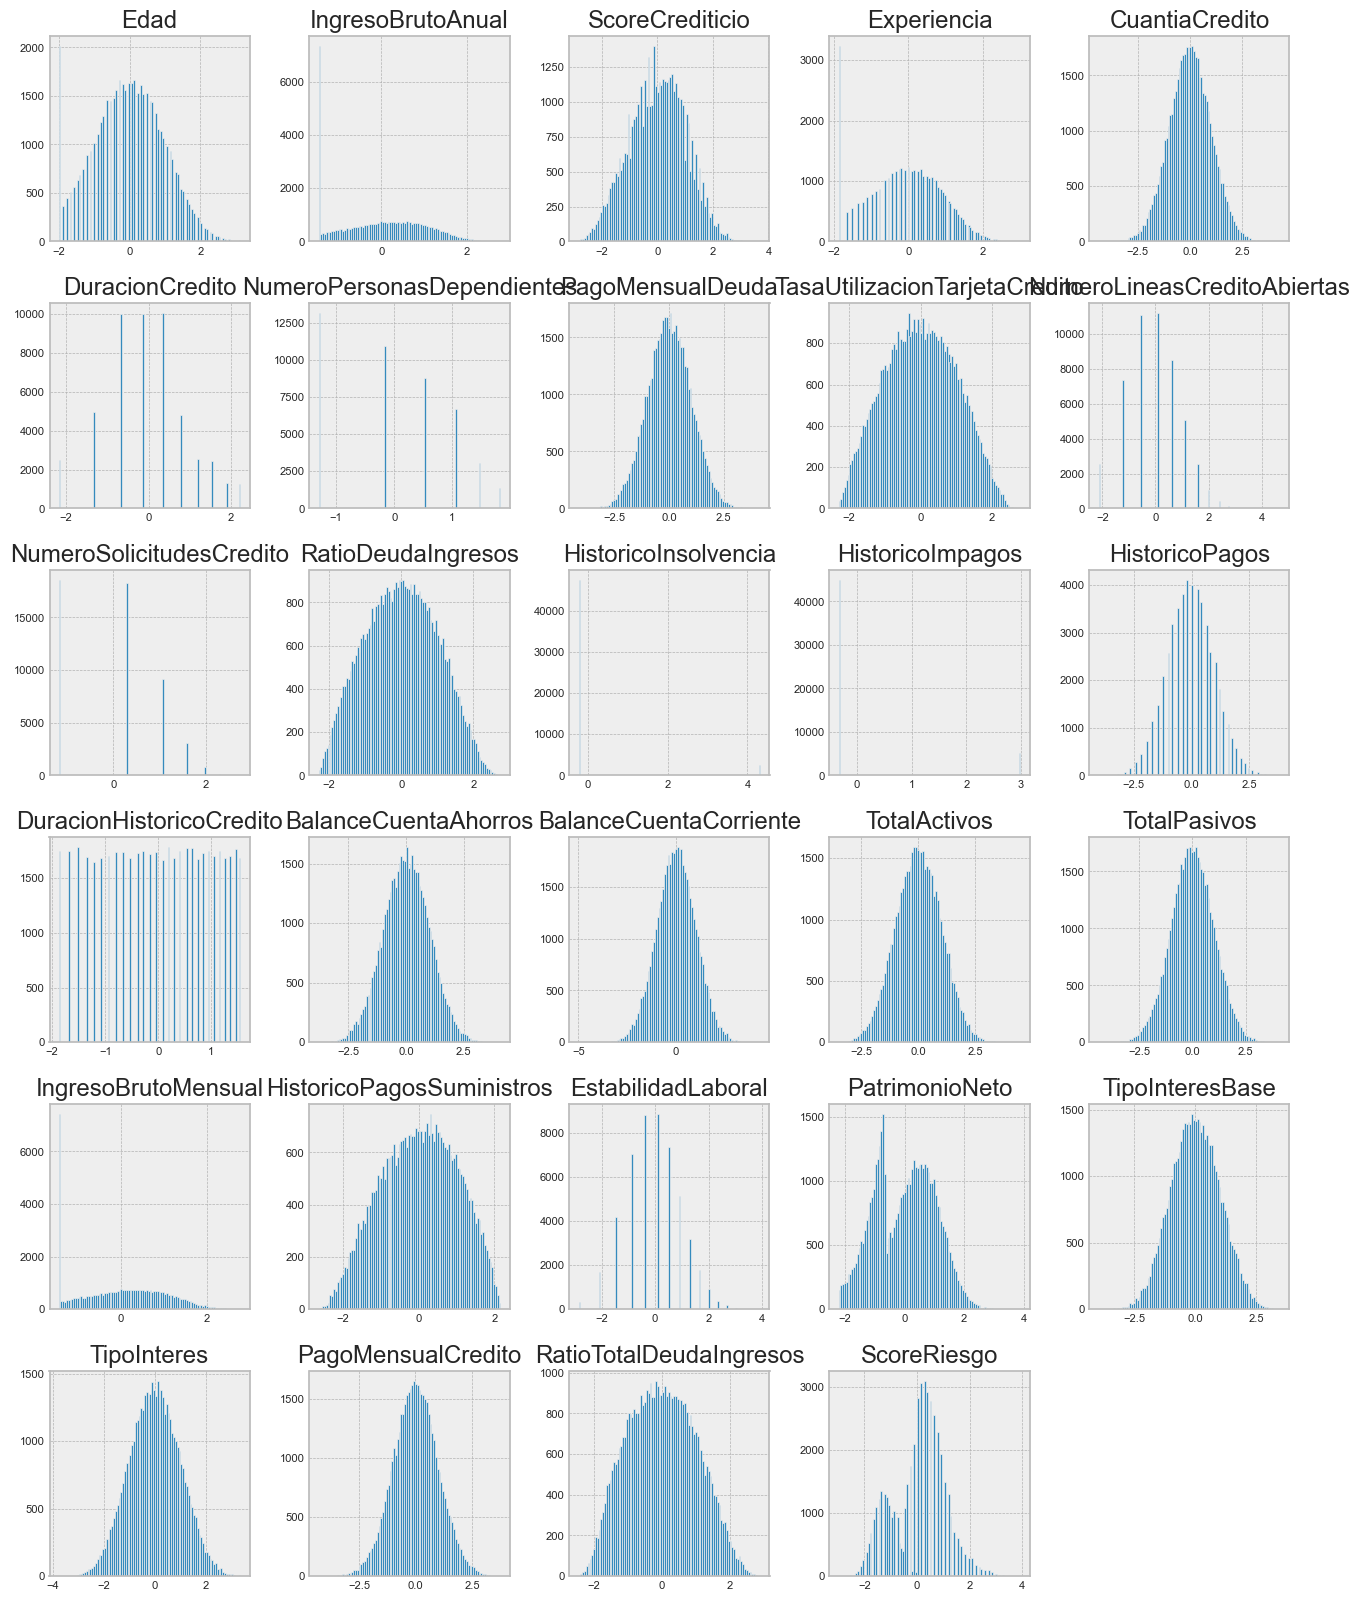

In [65]:
df_num_scaled.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)